In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


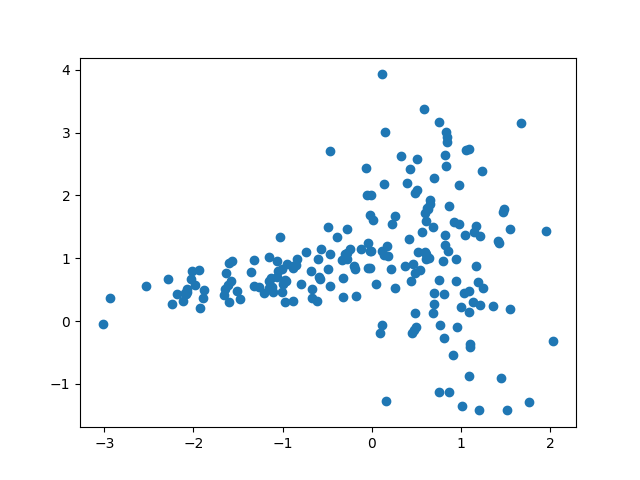

In [3]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

In [4]:
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=20) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(Xc_2)
predicted= clf.predict(Xc_2)
centroids= clf.cluster_centers_

In [5]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(Xc_2, centroids)


array([[2.19729877, 0.65490352, 1.61500809, ..., 1.93390278, 0.30257229,
        2.35623732],
       [3.82287946, 2.12859988, 1.27192936, ..., 4.07365574, 2.72053774,
        1.2874992 ],
       [1.41132676, 2.36376703, 1.90764451, ..., 2.03469114, 2.16174342,
        1.55413461],
       ...,
       [5.11134622, 2.87287827, 2.50217757, ..., 5.19877605, 3.57302776,
        2.84510291],
       [1.16816034, 1.32420186, 1.57575185, ..., 1.23730845, 0.84521997,
        1.91776116],
       [2.18993764, 0.43142596, 0.78796103, ..., 2.20502315, 0.71403565,
        1.52306574]])

In [6]:
def J(centroids, closest_centroids):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = Xc_2[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)

print ('Cost= {}'.format(J(centroids, predicted)))

Cost= 0.24803863320448233


<IPython.core.display.Javascript object>


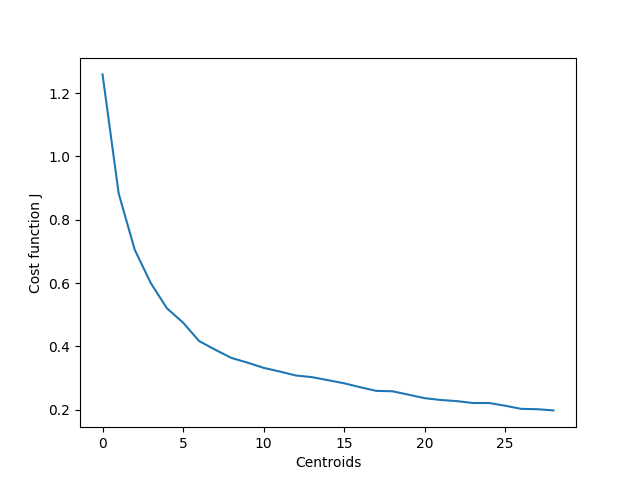

Text(0, 0.5, 'Cost function J')

In [9]:
J_hist = []
for i in range(1, 30):
    clf = KMeans(n_clusters=i)
    clf.fit(Xc_2)
    predicted= clf.predict(Xc_2)
    centroids= clf.cluster_centers_
    compute_distances(Xc_2, centroids)
    J_hist.append(J(centroids, predicted))
    
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Centroids')
plt.ylabel('Cost function J')

## the best k for Kmeans is 5